#K-means clustering algorithm to group customers of a retail store based on their purchase history

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load data
data = pd.read_csv('Mall_Customers.csv')
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
# Check for null values
print("Null Values:")
print(data.isnull().sum())

Null Values:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [4]:
# Descriptive statistics
print("Descriptive Statistics:")
print(data.describe())

Descriptive Statistics:
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


In [5]:
data.shape

(200, 5)

In [6]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [7]:

print("Unique Values in Spending Score:")
print(data['Spending Score (1-100)'].value_counts().unique())

Unique Values in Spending Score:
[8 7 6 5 4 3 2 1]


In [8]:
print("Value Counts for Annual Income:")
print(data['Annual Income (k$)'].value_counts())

Value Counts for Annual Income:
Annual Income (k$)
54     12
78     12
48      6
71      6
63      6
       ..
58      2
59      2
16      2
64      2
137     2
Name: count, Length: 64, dtype: int64


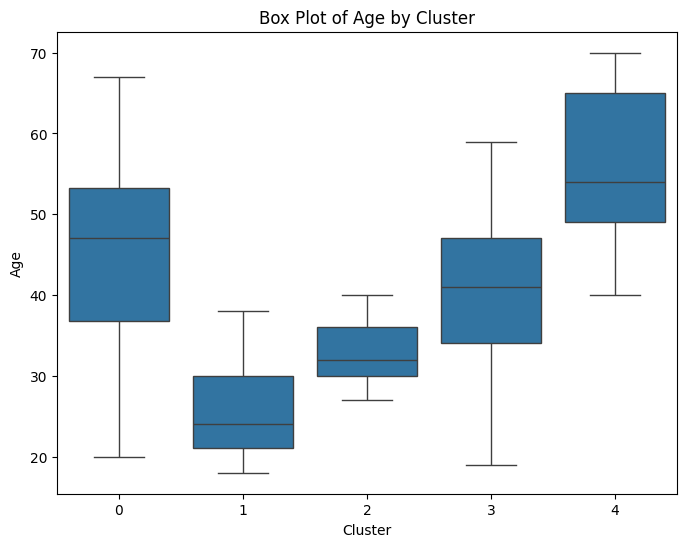

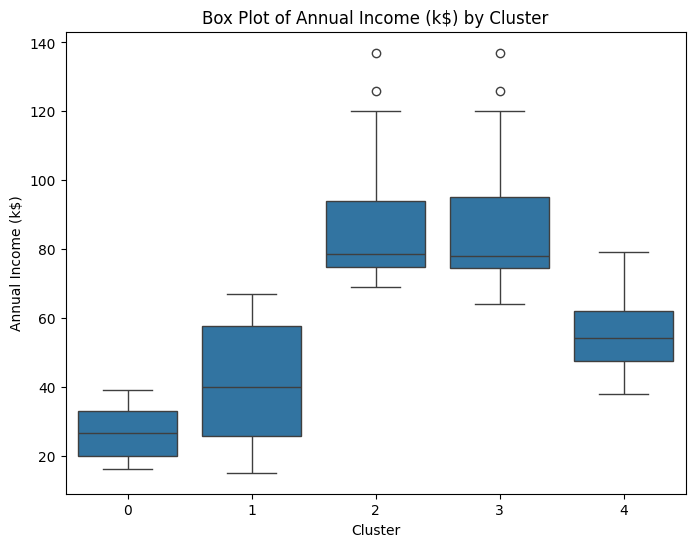

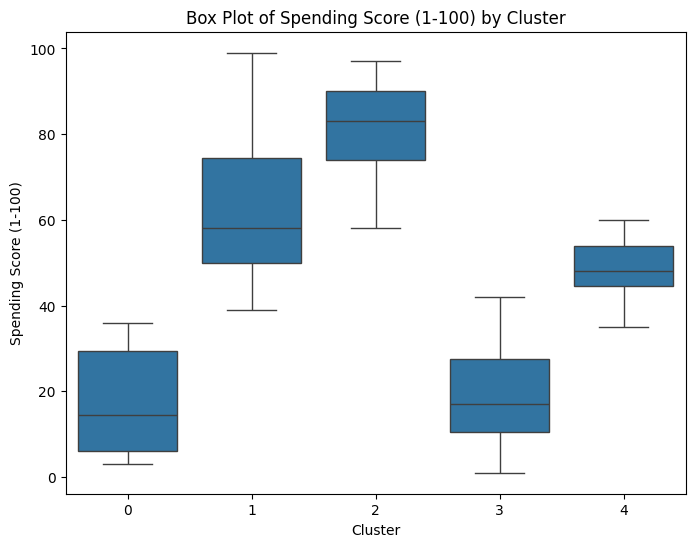

In [16]:
# Box plots for each feature within each cluster
for feature in features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Cluster', y=feature, data=data)
    plt.title(f'Box Plot of {feature} by Cluster')
    plt.show()

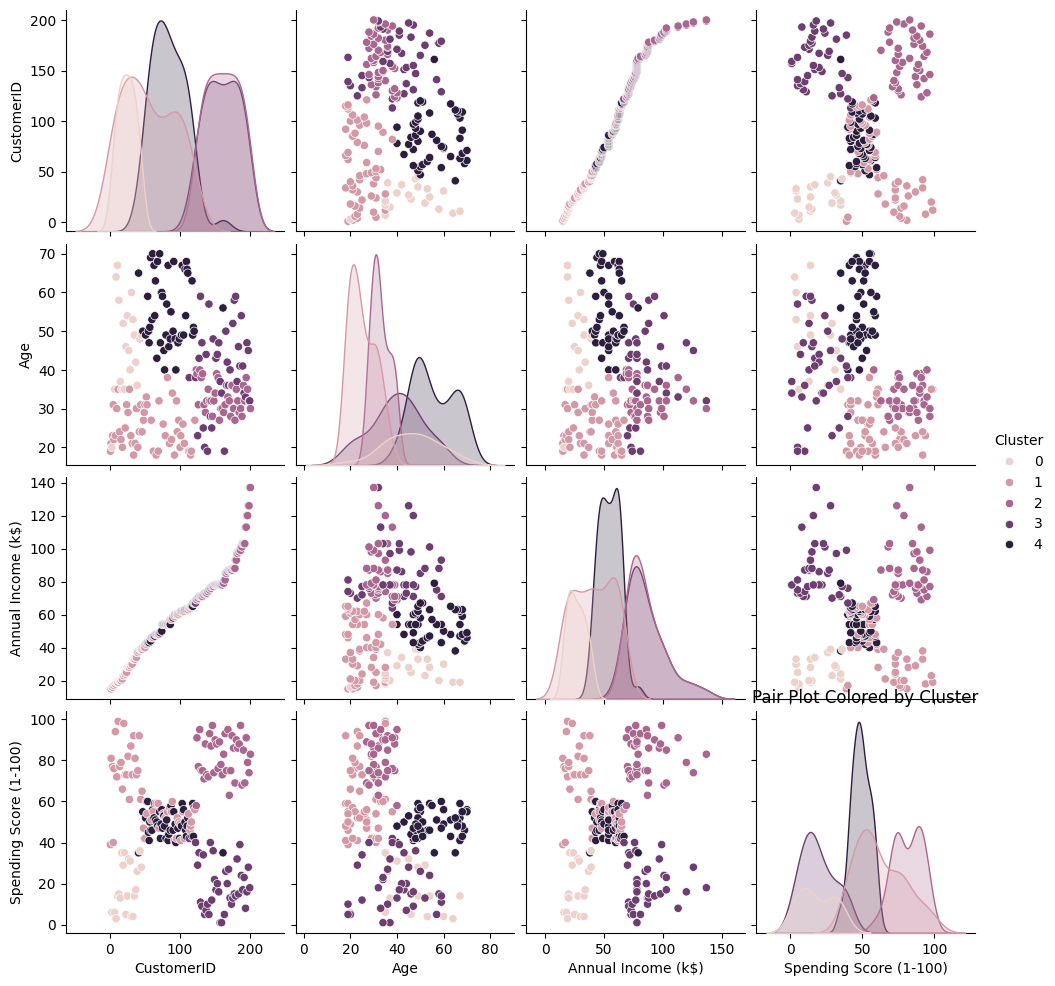

In [17]:
# Pair plot colored by cluster
sns.pairplot(data=data, hue='Cluster', diag_kind='kde')
plt.title('Pair Plot Colored by Cluster')
plt.show()

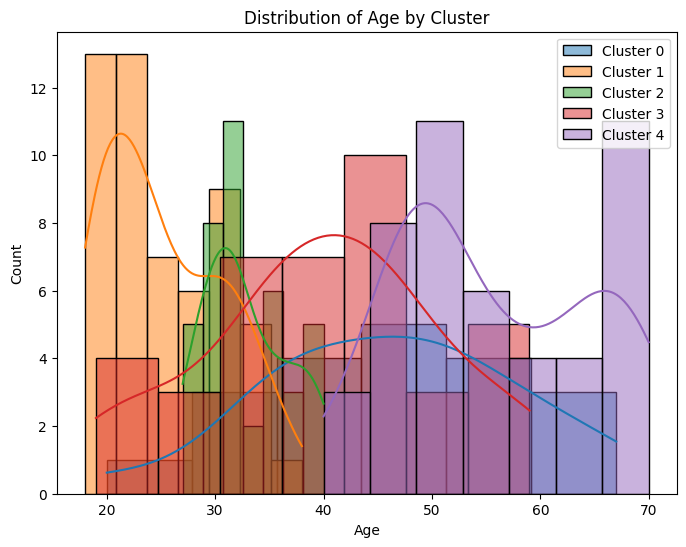

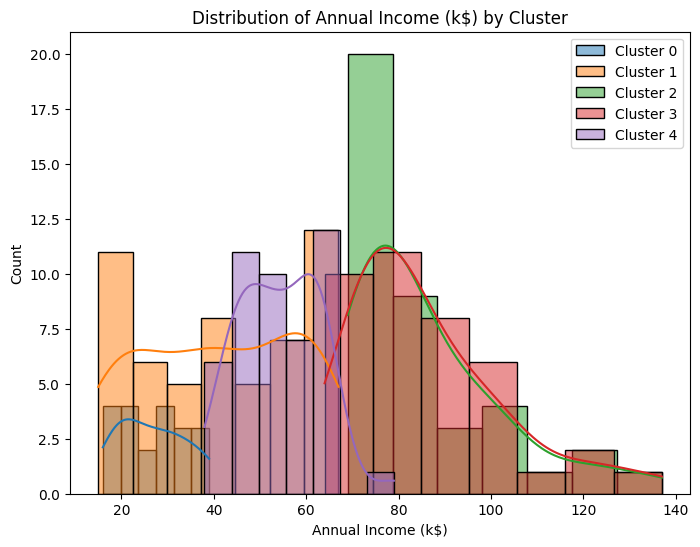

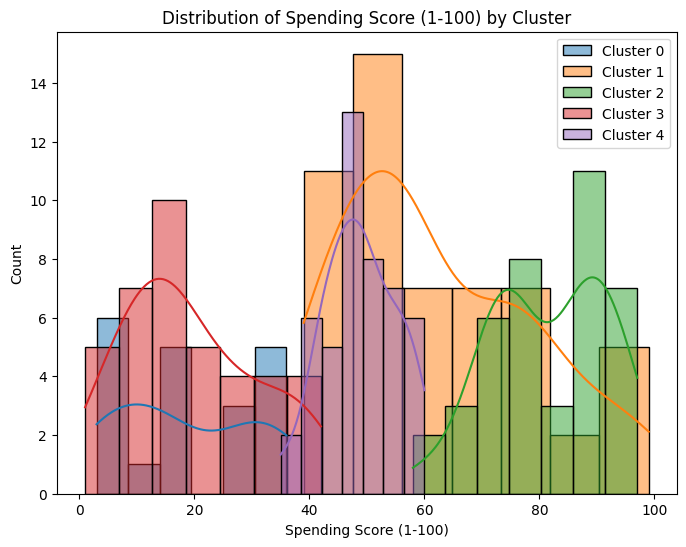

In [18]:
# Distribution plots for each feature within each cluster
for feature in features:
    plt.figure(figsize=(8, 6))
    for cluster_id in range(num_clusters):
        cluster_data = data[data['Cluster'] == cluster_id]
        sns.histplot(cluster_data[feature], label=f'Cluster {cluster_id}', kde=True)
    plt.title(f'Distribution of {feature} by Cluster')
    plt.legend()
    plt.show()

<Axes: >

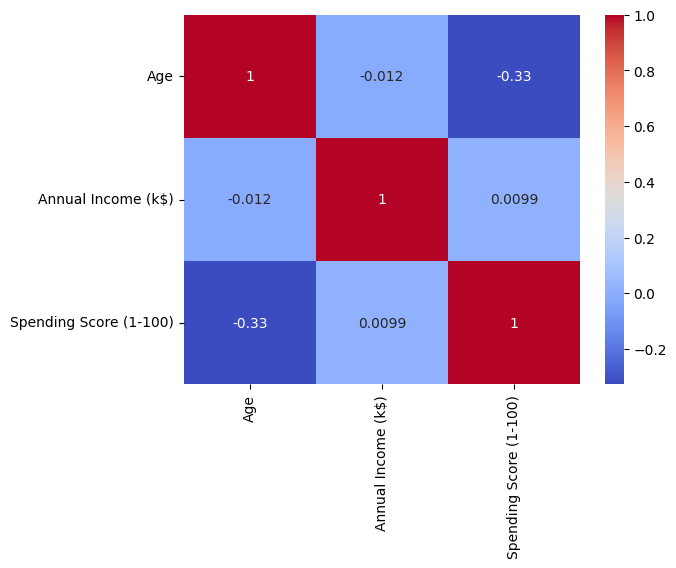

In [22]:
corr = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr()
sns.heatmap(corr, annot=True , cmap='coolwarm')